### A Gradient Boosted Decision Trees Classifier
##### We use Scikit Learn implementation and perform Grid Search to find optimal parameteres

In [1]:
import pandas as pd 

import matplotlib.pyplot as plt
import scikitplot as skplt

from time import time

# we use the scikit gradient boosting decsion trees model for this experiment 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

import preprocess

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\elfraiha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elfraiha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# import the advertising dataset 
# Each ad has a binary label 0 for commercial and 1 for informational ads 
df = pd.read_csv('../data/task1_dataset.csv')
df = df.iloc[: , 1:]

df.head()

,label,text
0,0,"""My Thistle subscription has changed my work f..."
1,0,"After I bought this toy for my child, he staye..."
2,0,A Black Friday purchase you actually won't reg...
3,0,"The Nutcracker, accompany you and your family ..."
4,0,ohora’s NEW COLLECTION - shop right away https...


In [4]:
# Cleaning the data and splitting it 
clean_data = preprocess.preprocess_data(df['text'])

In [5]:
# vectorize testing and training data 
vect_data = preprocess.tokenized_tfidf(clean_data)
(train_data, validation_data, test_data) = preprocess.eval_train_split(vect_data, df['label'])

In [ ]:
# Create the model and perform Grid Search to find optimal parameters
train_scores, test_scores = list(), list()
for i in range(8,32) :
  clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=i, random_state=0)
  clf.fit(train_data[0], train_data[1])
  # evaluate on the train dataset
  train_yhat = clf.predict(train_data[0])
  train_acc = metrics.accuracy_score(train_data[1], train_yhat)
  train_scores.append(train_acc)
  # evaluate on the test dataset
  test_yhat = clf.predict(test_data[0])
  test_acc = metrics.accuracy_score(test_data[1], test_yhat)
  test_scores.append(test_acc)
  # summarize progress
  print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

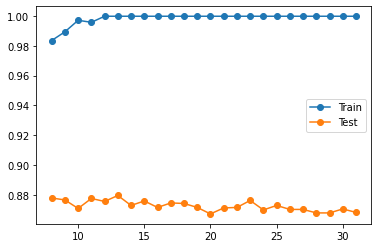

In [ ]:
# plot of train and test scores vs tree depth
values = [i for i in range(8, 32)]
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [ ]:
t= time()

clf = GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, max_depth=13, random_state=0)
clf.fit(train_data[0], train_data[1])

training_time = time() - t
print("Training time:  %0.3fs" % training_time)

Training time:  0.000s


test time:  0.338s
accuracy:   0.848
              precision    recall  f1-score   support

         Inf       0.81      0.91      0.86      1512
         Com       0.89      0.79      0.84      1476

    accuracy                           0.85      2988
   macro avg       0.85      0.85      0.85      2988
weighted avg       0.85      0.85      0.85      2988

confusion matrix:
[[1376  136]
 [ 317 1159]]



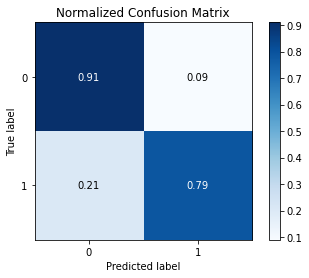

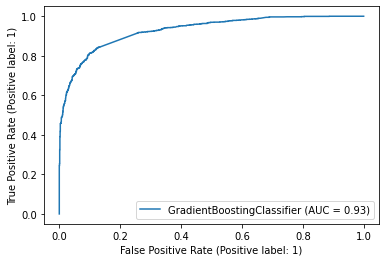

In [ ]:
# predict the labels on validation dataset
t= time()
predictions = clf.predict(test_data[0])

test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(test_data[1], predictions)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(test_data[1], predictions,
                                            target_names=['Inf', 'Com']))

print("confusion matrix:")
print(metrics.confusion_matrix(test_data[1], predictions))
print()
skplt.metrics.plot_confusion_matrix(test_data[1], predictions, normalize=True)
plt.show()
svc_disp = metrics.RocCurveDisplay.from_estimator(clf, test_data[0], test_data[1])